In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
from statsmodels.tsa.ar_model import AutoReg

In [6]:
# Đọc file và tiền xử lí dữ liệu
df = pd.read_csv('../data/BID.csv')
# Tiền xử lí dữ liệu
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)
    
# Áp dụng hàm chuyển đổi cho cột "Vol."
df["Vol."] = df["Vol."].apply(convert_volume_to_number)

# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

# Áp dụng hàm chuyển đổi cho cột "Change %"
df["Change %"] = df["Change %"].apply(convert_change_to_number)

# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))

# Áp dụng hàm chuyển đổi cho các cột giá trị
df['Price'] = df['Price'].apply(convert_str_to_number)
df['Open'] = df['Open'].apply(convert_str_to_number)
df['High'] = df['High'].apply(convert_str_to_number)
df['Low'] = df['Low'].apply(convert_str_to_number)
# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
# Create a new column 'Day' as the number of days since the start date
df['Day'] = (df['Date'] - df['Date'].min()).dt.days

In [7]:
# Prepare features and target
X = df[['Day']]
y = df['Price']

# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False)
# 
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train models
for model_name, model in models.items():
    model.fit(X_train, y_train)

# Make predictions
predictions = {model_name: model.predict(X_test) for model_name, model in models.items()}

# tính trọng số
def calculate_weights(models, X_test, y_test):
    errors = {}
    for model_name, model in models.items():
        y_pred = model.predict(X_test)
        errors[model_name] = np.mean(np.abs((y_test - y_pred) / y_test))
    total_error = sum(errors.values())
    weights = {model_name: (1 - error / total_error) for model_name, error in errors.items()}
    return weights

weights = calculate_weights(models, X_test, y_test)

# Calculate weighted average predictions
combined_predictions = np.zeros(len(X_test))
for model_name, prediction in predictions.items():
    combined_predictions += weights[model_name] * prediction
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, combined_predictions)
mse = mean_squared_error(y_test, combined_predictions)
mape = np.mean(np.abs((y_test - combined_predictions) / y_test))
rmse = np.sqrt(mse)
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")



MAE: 33902.363037378855
RMSE: 34069.36117650805
MAPE: 1.1243144299347543


Predictions for the next 30 days: [93340.48509293 93349.33031244 93358.17553195 93367.02075146
 93375.86597097 93384.71119048 93393.55640999 93402.4016295
 93411.24684901 93420.09206852 93428.93728803 93437.78250754
 93446.62772705 93455.47294656 93464.31816607 93473.16338558
 93482.00860509 93490.8538246  93499.69904411 93508.54426362
 93517.38948313 93526.23470264 93535.07992215 93543.92514166
 93552.77036117 93561.61558068 93570.46080019 93579.3060197
 93588.15123921 93596.99645872]
Predictions for the next 60 days: [93340.48509293 93349.33031244 93358.17553195 93367.02075146
 93375.86597097 93384.71119048 93393.55640999 93402.4016295
 93411.24684901 93420.09206852 93428.93728803 93437.78250754
 93446.62772705 93455.47294656 93464.31816607 93473.16338558
 93482.00860509 93490.8538246  93499.69904411 93508.54426362
 93517.38948313 93526.23470264 93535.07992215 93543.92514166
 93552.77036117 93561.61558068 93570.46080019 93579.3060197
 93588.15123921 93596.99645872 93605.84167823 9361

c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor

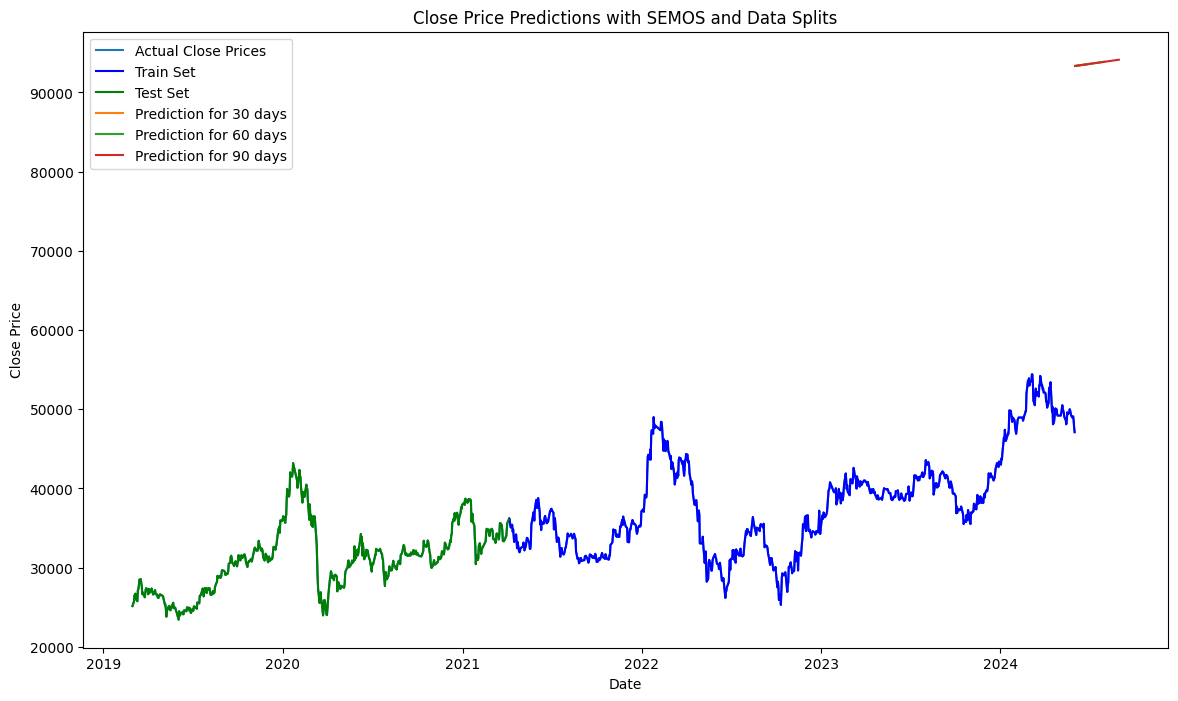

In [8]:
# Predict the future 'Close' prices for 30, 60, and 90 days
future_days = [30, 60, 90]
future_predictions = {}

last_day = X['Day'].max()
for days in future_days:
    future_X = np.array([last_day + i for i in range(1, days + 1)]).reshape(-1, 1)
    future_combined_predictions = np.zeros(len(future_X))
    for model_name, model in models.items():
        future_combined_predictions += weights[model_name] * model.predict(future_X)

    future_predictions[days] = future_combined_predictions

# Print daily predictions for 30, 60, and 90 days
for days, prediction in future_predictions.items():
    print(f"Predictions for the next {days} days: {prediction}")

# Plotting the results
plt.figure(figsize=(14, 8))
plt.plot(df['Date'], y, label='Actual Close Prices')

# Plot train and test sets
plt.plot(df['Date'][:len(X_train)], y_train, label='Train Set', color='blue')
plt.plot(df['Date'][len(X_train):], y_test, label='Test Set', color='green')

# Plot future predictions
for days, prediction in future_predictions.items():
    future_dates = [df['Date'].max() + pd.Timedelta(days=i) for i in range(1, days + 1)]
    plt.plot(future_dates, prediction, label=f'Prediction for {days} days')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Predictions with SEMOS and Data Splits')
plt.legend()
plt.show()